In [ ]:
# 1. DBSCAN Clustering

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Mall_Customers.csv") # importing the dataset

In [21]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
print("Dataset shape:", data.shape)

Dataset shape: (200, 5)


In [23]:
# checking for NULL data in the dataset
data.isnull().any().any()

False

In [24]:
# extracting the above mentioned columns
x = data.loc[:, ['Annual Income (k$)',
                 'Spending Score (1-100)']].values

In [25]:
print(x.shape)

(200, 2)


In [30]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

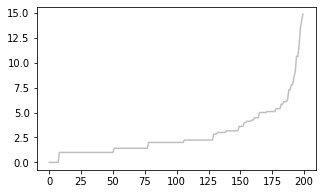

In [31]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances, color='silver') # plotting the distances
plt.show() # showing the plot

In [39]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

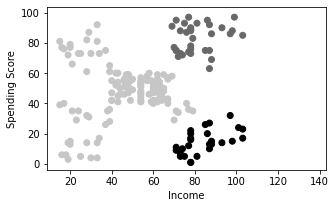

In [38]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "Greys") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot

In [ ]:
# 2. K Means Clustering

In [40]:
import numpy as np
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

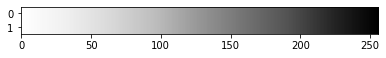

In [76]:

def plot_color_gradient(cmap_name):
    gradient = np.linspace(0, 50, 256)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots(figsize=(6.4,.5))
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(cmap_name))
    
plot_color_gradient('Greys')

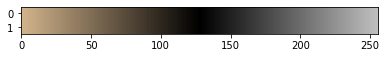

In [79]:
colors=["tan","black","silver"]
nodes = [0.0, 0.5, 1.0]
my_cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
plot_color_gradient(my_cmap)

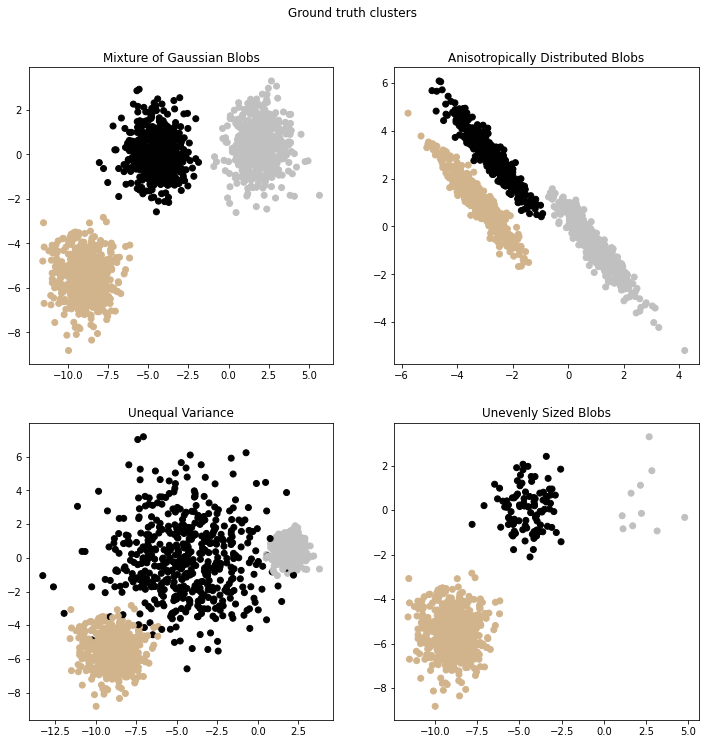

In [82]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap=my_cmap)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y, cmap=my_cmap)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied, cmap=my_cmap)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered, cmap=my_cmap)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


circles, perplexity=5 in 0.79 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


circles, perplexity=30 in 0.89 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


circles, perplexity=50 in 0.8 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


circles, perplexity=100 in 0.45 sec
S-curve, perplexity=5 in 0.28 sec
S-curve, perplexity=30 in 0.38 sec
S-curve, perplexity=50 in 0.42 sec
S-curve, perplexity=100 in 0.42 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


uniform grid, perplexity=5 in 0.28 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


uniform grid, perplexity=30 in 0.46 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


uniform grid, perplexity=50 in 0.46 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


uniform grid, perplexity=100 in 0.45 sec


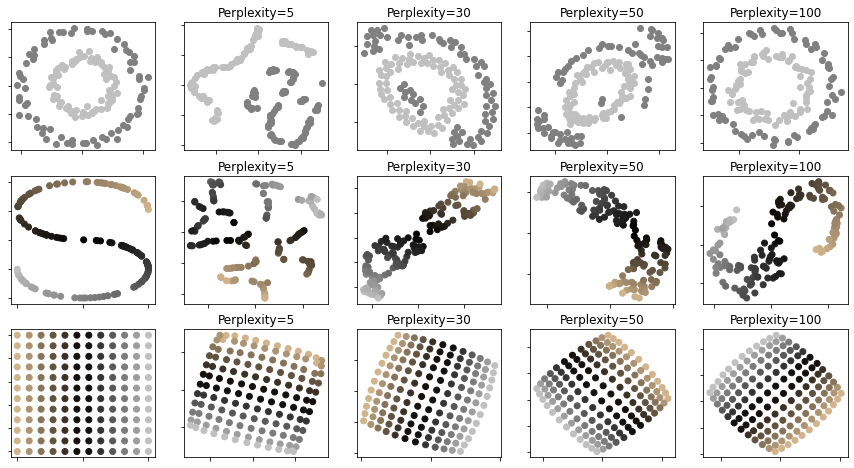

In [123]:
# 3. TSNE perplexity
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

grey = y == 0
silver = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="grey")
ax.scatter(X[green, 0], X[green, 1], c="silver")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[grey, 0], Y[grey, 1], c="grey")
    ax.scatter(Y[silver, 0], Y[silver, 1], c="silver")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color, cmap=my_cmap)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=my_cmap)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color, cmap=my_cmap)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=my_cmap)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()

In [ ]:
# 4. UMAP
# https://umap-learn.readthedocs.io/en/latest/clustering.html

In [108]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 12.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=651f01e250f3d1199dccd8284b4efe712ae89bbe00bf2cdcf532e08b558821eb
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=b3bb9114143dbd1bbeb5a0e160ac7010c8fdccdb0fb1acf688662e6fe4a3c8a4
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [96]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700840 sha256=311a51dbfd6ab25cb8718d87d0acaf0f40bb68d323abf4176235e570bfdb797a
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [114]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries

import umap.umap_ as umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [115]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(int)

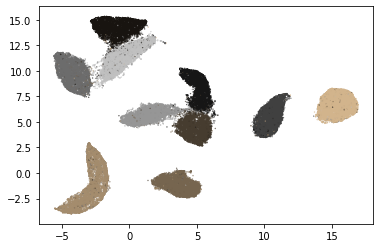

In [124]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(mnist.data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target.astype(int), s=0.1, cmap=my_cmap);

In [125]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(mnist.data)

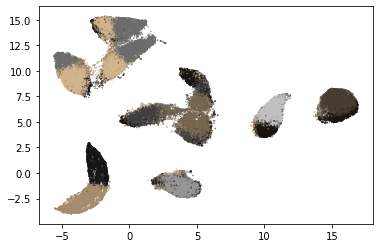

In [126]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap=my_cmap);

In [118]:
(    adjusted_rand_score(mnist.target, kmeans_labels),
    adjusted_mutual_info_score(mnist.target, kmeans_labels))

(0.3650201611566803, 0.48476491437457525)

In [ ]:
# 5. TensorFlow Clustering
# TensorFlow Model Optimization
# weight clustering
# deployment in resource-constrained environments

In [1]:
! pip install -q tensorflow-model-optimization

     |████████████████████████████████| 238 kB 5.0 MB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import tempfile
import zipfile
import os

In [3]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images  = test_images / 255.0

# Define the model architecture.
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28)),
    keras.layers.Reshape(target_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
    train_images,
    train_labels,
    validation_split=0.1,
    epochs=10
)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.3172 - accuracy: 0.9094 - val_loss: 0.1388 - val_accuracy: 0.9640
Epoch 2/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1437 - accuracy: 0.9586 - val_loss: 0.1016 - val_accuracy: 0.9730
Epoch 3/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0991 - accuracy: 0.9715 - val_loss: 0.0802 - val_accuracy: 0.9778
Epoch 4/10
1688/1688 [==============================] - 24s 15ms/step - loss: 0.0788 - accuracy: 0.9770 - val_loss: 0.0640 - val_accuracy: 0.9827
Epoch 5/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0664 - accuracy: 0.9804 - val_loss: 0.0637 - val_accuracy: 0.9828
Epoch 6/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0583 - val_accuracy: 0.9840
Epoch 7/10
1688/1688 [==============================] - 25s

In [6]:
# Evaluate the baseline model and save it for later usage
_, baseline_model_accuracy = model.evaluate(
    test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)

_, keras_file = tempfile.mkstemp('.h5')
print('Saving model to: ', keras_file)
tf.keras.models.save_model(model, keras_file, include_optimizer=False)

Baseline test accuracy: 0.9807000160217285
Saving model to:  /tmp/tmp6a42_itz.h5


In [5]:
# Fine-tune the pre-trained model with clustering
# Apply the cluster_weights() API to a whole pre-trained model to show its effectiveness in 
# reducing the model size after applying zip while keeping decent accuracy. For how best to 
# balance the accuracy and compression rate for your use case, please refer to the per layer 
# example in the comprehensive guide.
# Before you pass the model to the clustering API, make sure it is trained and shows some acceptable accuracy.

import tensorflow_model_optimization as tfmot

cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 16,
  'cluster_centroids_init': CentroidInitialization.LINEAR
}

# Cluster a whole model
clustered_model = cluster_weights(model, **clustering_params)

# Use smaller learning rate for fine-tuning clustered model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

clustered_model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy'])

clustered_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cluster_reshape (ClusterWei  (None, 28, 28, 1)        0         
 ghts)                                                           
                                                                 
 cluster_conv2d (ClusterWeig  (None, 26, 26, 12)       244       
 hts)                                                            
                                                                 
 cluster_max_pooling2d (Clus  (None, 13, 13, 12)       0         
 terWeights)                                                     
                                                                 
 cluster_flatten (ClusterWei  (None, 2028)             0         
 ghts)                                                           
                                                                 
 cluster_dense (ClusterWeigh  (None, 10)               4

In [7]:
# Fine-tune model with clustering for 1 epoch and evaluate the accuracy against baseline
clustered_model.fit(
  train_images,
  train_labels,
  batch_size=500,
  epochs=1,
  validation_split=0.1)

108/108 [==============================] - 18s 158ms/step - loss: 0.0453 - accuracy: 0.9850 - val_loss: 0.0670 - val_accuracy: 0.9808


In [8]:
# For this example, there is minimal loss in test accuracy after clustering, compared to the baseline.
_, clustered_model_accuracy = clustered_model.evaluate(
  test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)
print('Clustered test accuracy:', clustered_model_accuracy)

Baseline test accuracy: 0.9807000160217285
Clustered test accuracy: 0.9776999950408936


In [9]:
# Create 6x smaller models from clustering
# Both strip_clustering and applying a standard compression algorithm (e.g. via gzip) are necessary to see the compression benefits of clustering.
# First, create a compressible model for TensorFlow. 
# Here, strip_clustering removes all variables (e.g. tf.Variable for storing the cluster centroids and the indices) that clustering only needs during training, which would otherwise add to model size during inference.
final_model = tfmot.clustering.keras.strip_clustering(clustered_model)

_, clustered_keras_file = tempfile.mkstemp('.h5')
print('Saving clustered model to: ', clustered_keras_file)
tf.keras.models.save_model(final_model, clustered_keras_file, 
                           include_optimizer=False)

Saving clustered model to:  /tmp/tmpfavj7sn_.h5


In [10]:
# Then, create compressible models for TFLite. You can convert the clustered model to a format that's runnable on your targeted backend. 
# TensorFlow Lite is an example you can use to deploy to mobile devices.
clustered_tflite_file = '/tmp/clustered_mnist.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
tflite_clustered_model = converter.convert()
with open(clustered_tflite_file, 'wb') as f:
  f.write(tflite_clustered_model)
print('Saved clustered TFLite model to:', clustered_tflite_file)

Saved clustered TFLite model to: /tmp/clustered_mnist.tflite


In [11]:
# Define a helper function to actually compress the models via gzip and measure the zipped size.
def get_gzipped_model_size(file):
  # It returns the size of the gzipped model in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [12]:
# Compare and see that the models are 6x smaller from clustering
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped clustered Keras model: %.2f bytes" % (get_gzipped_model_size(clustered_keras_file)))
print("Size of gzipped clustered TFlite model: %.2f bytes" % (get_gzipped_model_size(clustered_tflite_file)))

Size of gzipped baseline Keras model: 1817.00 bytes
Size of gzipped clustered Keras model: 12278.00 bytes
Size of gzipped clustered TFlite model: 11693.00 bytes


In [16]:
# Create an 8x smaller TFLite model from combining weight clustering and post-training quantization
# You can apply post-training quantization to the clustered model for additional benefits.
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

_, quantized_and_clustered_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_clustered_tflite_file, 'wb') as f:
  f.write(tflite_quant_model)

print('Saved quantized and clustered TFLite model to:', quantized_and_clustered_tflite_file)
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped clustered and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_clustered_tflite_file)))

Saved quantized and clustered TFLite model to: /tmp/tmpa52b27nd.tflite
Size of gzipped baseline Keras model: 1817.00 bytes
Size of gzipped clustered and quantized TFlite model: 9035.00 bytes


In [13]:
# See the persistence of accuracy from TF to TFLite
# Define a helper function to evaluate the TFLite model on the test dataset.
def eval_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_images):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels).mean()
  return accuracy

In [17]:
# You evaluate the model, which has been clustered and quantized, and then see the accuracy from TensorFlow persists to the TFLite backend.
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)
interpreter.allocate_tensors()

test_accuracy = eval_model(interpreter)

print('Clustered and quantized TFLite test_accuracy:', test_accuracy)
print('Clustered TF test accuracy:', clustered_model_accuracy)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.
Evaluated on 3000 results so far.
Evaluated on 4000 results so far.
Evaluated on 5000 results so far.
Evaluated on 6000 results so far.
Evaluated on 7000 results so far.
Evaluated on 8000 results so far.
Evaluated on 9000 results so far.


Clustered and quantized TFLite test_accuracy: 0.978
Clustered TF test accuracy: 0.9776999950408936
